## Final Project Submission

* Student name: Alla Gonzalez
* Student pace: Part Time
* Scheduled project review date/time: Thu, May 16, 12 pm CDT
* Instructor name: Victor Geislinger
* Blog post URL:


In this project, our goal is to understand which features in our data set affect housing prices the most, so we can reliably predict housing prices knowing these features in the future.

In [1]:
#Loading packages that will be needed for this project
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

## Obtaining Data

First off, we need to load the data set that we will be exploring.

In [2]:
df = pd.read_csv('kc_house_data.csv')

Let's take the first look at the data.

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
21592      1131     3.0         0.0   0.0     ...          8        1530   
21593      5813     2.0         0.0   0.0     ...          8        2310   
21594      1350     2.0         0.0   0.0     ...          7        1020   
21595      2388     2.0         NaN   0.0     ...          8        1600   
21596      1076     2.0         0.0   0.0     ...          7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

## Scrubbing Data

Now we will take a closer look at the data and make sure it is in the format we can use for modeling.

In [5]:
df.shape

(21597, 21)

In [6]:
#Reviewing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


**Observations:**
- missing data in waterfront, view, yr_renovated
- sqft_basement is a string now, but should be a numeric value
- we might need to transform some categorical variables like 'Waterfront'

In [7]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
248.0         1
862.0         1
3260.0        1
225.0         1
2190.0        1
2500.0        1
518.0         1
2250.0        1
784.0         1
602.0         1
1770.0        1
946.0         1
652.0         1
172.0         1
2490.0        1
274.0         1
1284.0        1
792.0         1
1481.0        1
666.0         1
1920.0        1
1275.0        1
508.0         1
20.0          1
2310.0        1
1852.0        1
176.0         1
2730.0        1
3480.0        1
906.0         1
Name: sqft_basement, Len

In [8]:
df.sqft_basement.replace('?', np.nan, inplace=True)

In [9]:
df.sqft_basement = df.sqft_basement.astype('float')

In [10]:
#Checking for NaNs
df.isna().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
sqft_basement     454
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [11]:
df.isna().sum() / len (df)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

**Observations:**
- The number of NaNs is pretty low at 17%, 11%, 2% and 0.2%
- We need to check for placeholder values

In [12]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21143.000000  21597.000000  17755.000000   
mean       7.657915   1788.596842     291.851724   1970.999676     83.636778   
std        1.173200    827.759761     442.498337     29.375234    399.946414   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

**Observations**
- Max number of bedrooms stands out at 33
- Waterfront, view, condition and grade look like categorical values
- yr_renovated is skewed by 0 values

In [13]:
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())

In [14]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21596.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.371828      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.904114      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21143.000000  21597.000000  17755.000000   
mean       7.657915   1788.596842     291.851724   1970.999676     83.636778   
std        1.173200    827.759761     442.498337     29.375234    399.946414   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


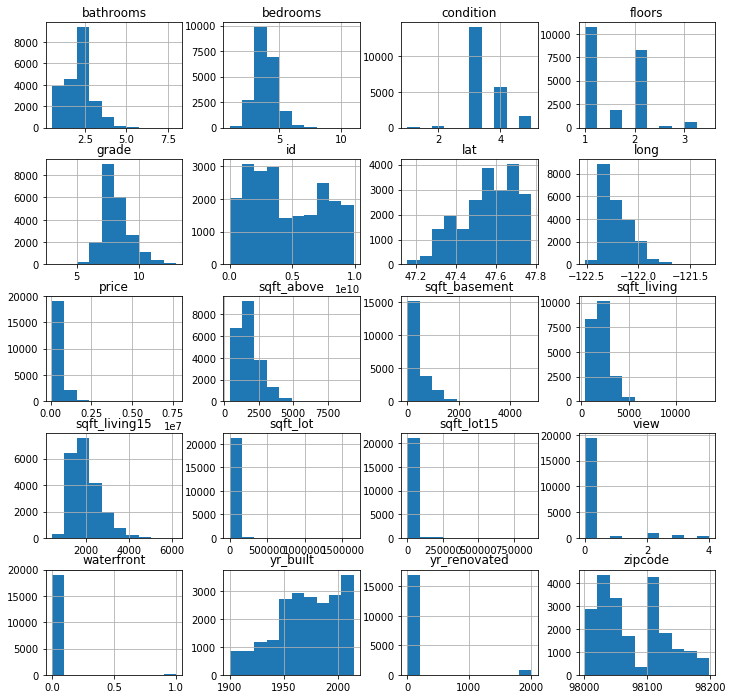

In [15]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax=ax);

In [16]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [17]:
df.yr_renovated.value_counts(ascending=False)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Since the majority of data (79%) in yr_renovated is either 0 or NaN, we can drop the column.

In [18]:
df.drop('yr_renovated', axis=1, inplace=True)

In [19]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [20]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Zero is the most common value for the categorical 'Waterfront' column, so we are going to replace NaNs with 0.

In [21]:
df.waterfront.replace(np.NaN, 0, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21596 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 3.3+ MB


In [23]:
df.bedrooms.unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., nan])

In [24]:
df.bedrooms.isna().sum()

1

In [25]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

We'll consider that NaN in this case stands for no information on whether the house has been viewed or not, so we'll change NaNs to 0.

In [26]:
df.view.replace(np.NaN, 0, inplace=True)

In [27]:
df.view.unique()

array([0., 3., 4., 2., 1.])

The only 2 columns where we have NaNs left are 'basement' (454) and 'bedrooms' (1). Let's drop the rows containing NaN values.

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 20 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null float64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       21142 non-null float64
view             21142 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null float64
yr_built         21142 non-null int64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 3.4+ MB


In [30]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
df.bedrooms = df.bedrooms.astype('int')

In [32]:
df.sqft_basement = df.sqft_basement.astype('int')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 20 columns):
id               21142 non-null int64
date             21142 non-null object
price            21142 non-null float64
bedrooms         21142 non-null int64
bathrooms        21142 non-null float64
sqft_living      21142 non-null int64
sqft_lot         21142 non-null int64
floors           21142 non-null float64
waterfront       21142 non-null float64
view             21142 non-null float64
condition        21142 non-null int64
grade            21142 non-null int64
sqft_above       21142 non-null int64
sqft_basement    21142 non-null int64
yr_built         21142 non-null int64
zipcode          21142 non-null int64
lat              21142 non-null float64
long             21142 non-null float64
sqft_living15    21142 non-null int64
sqft_lot15       21142 non-null int64
dtypes: float64(7), int64(12), object(1)
memory usage: 3.4+ MB


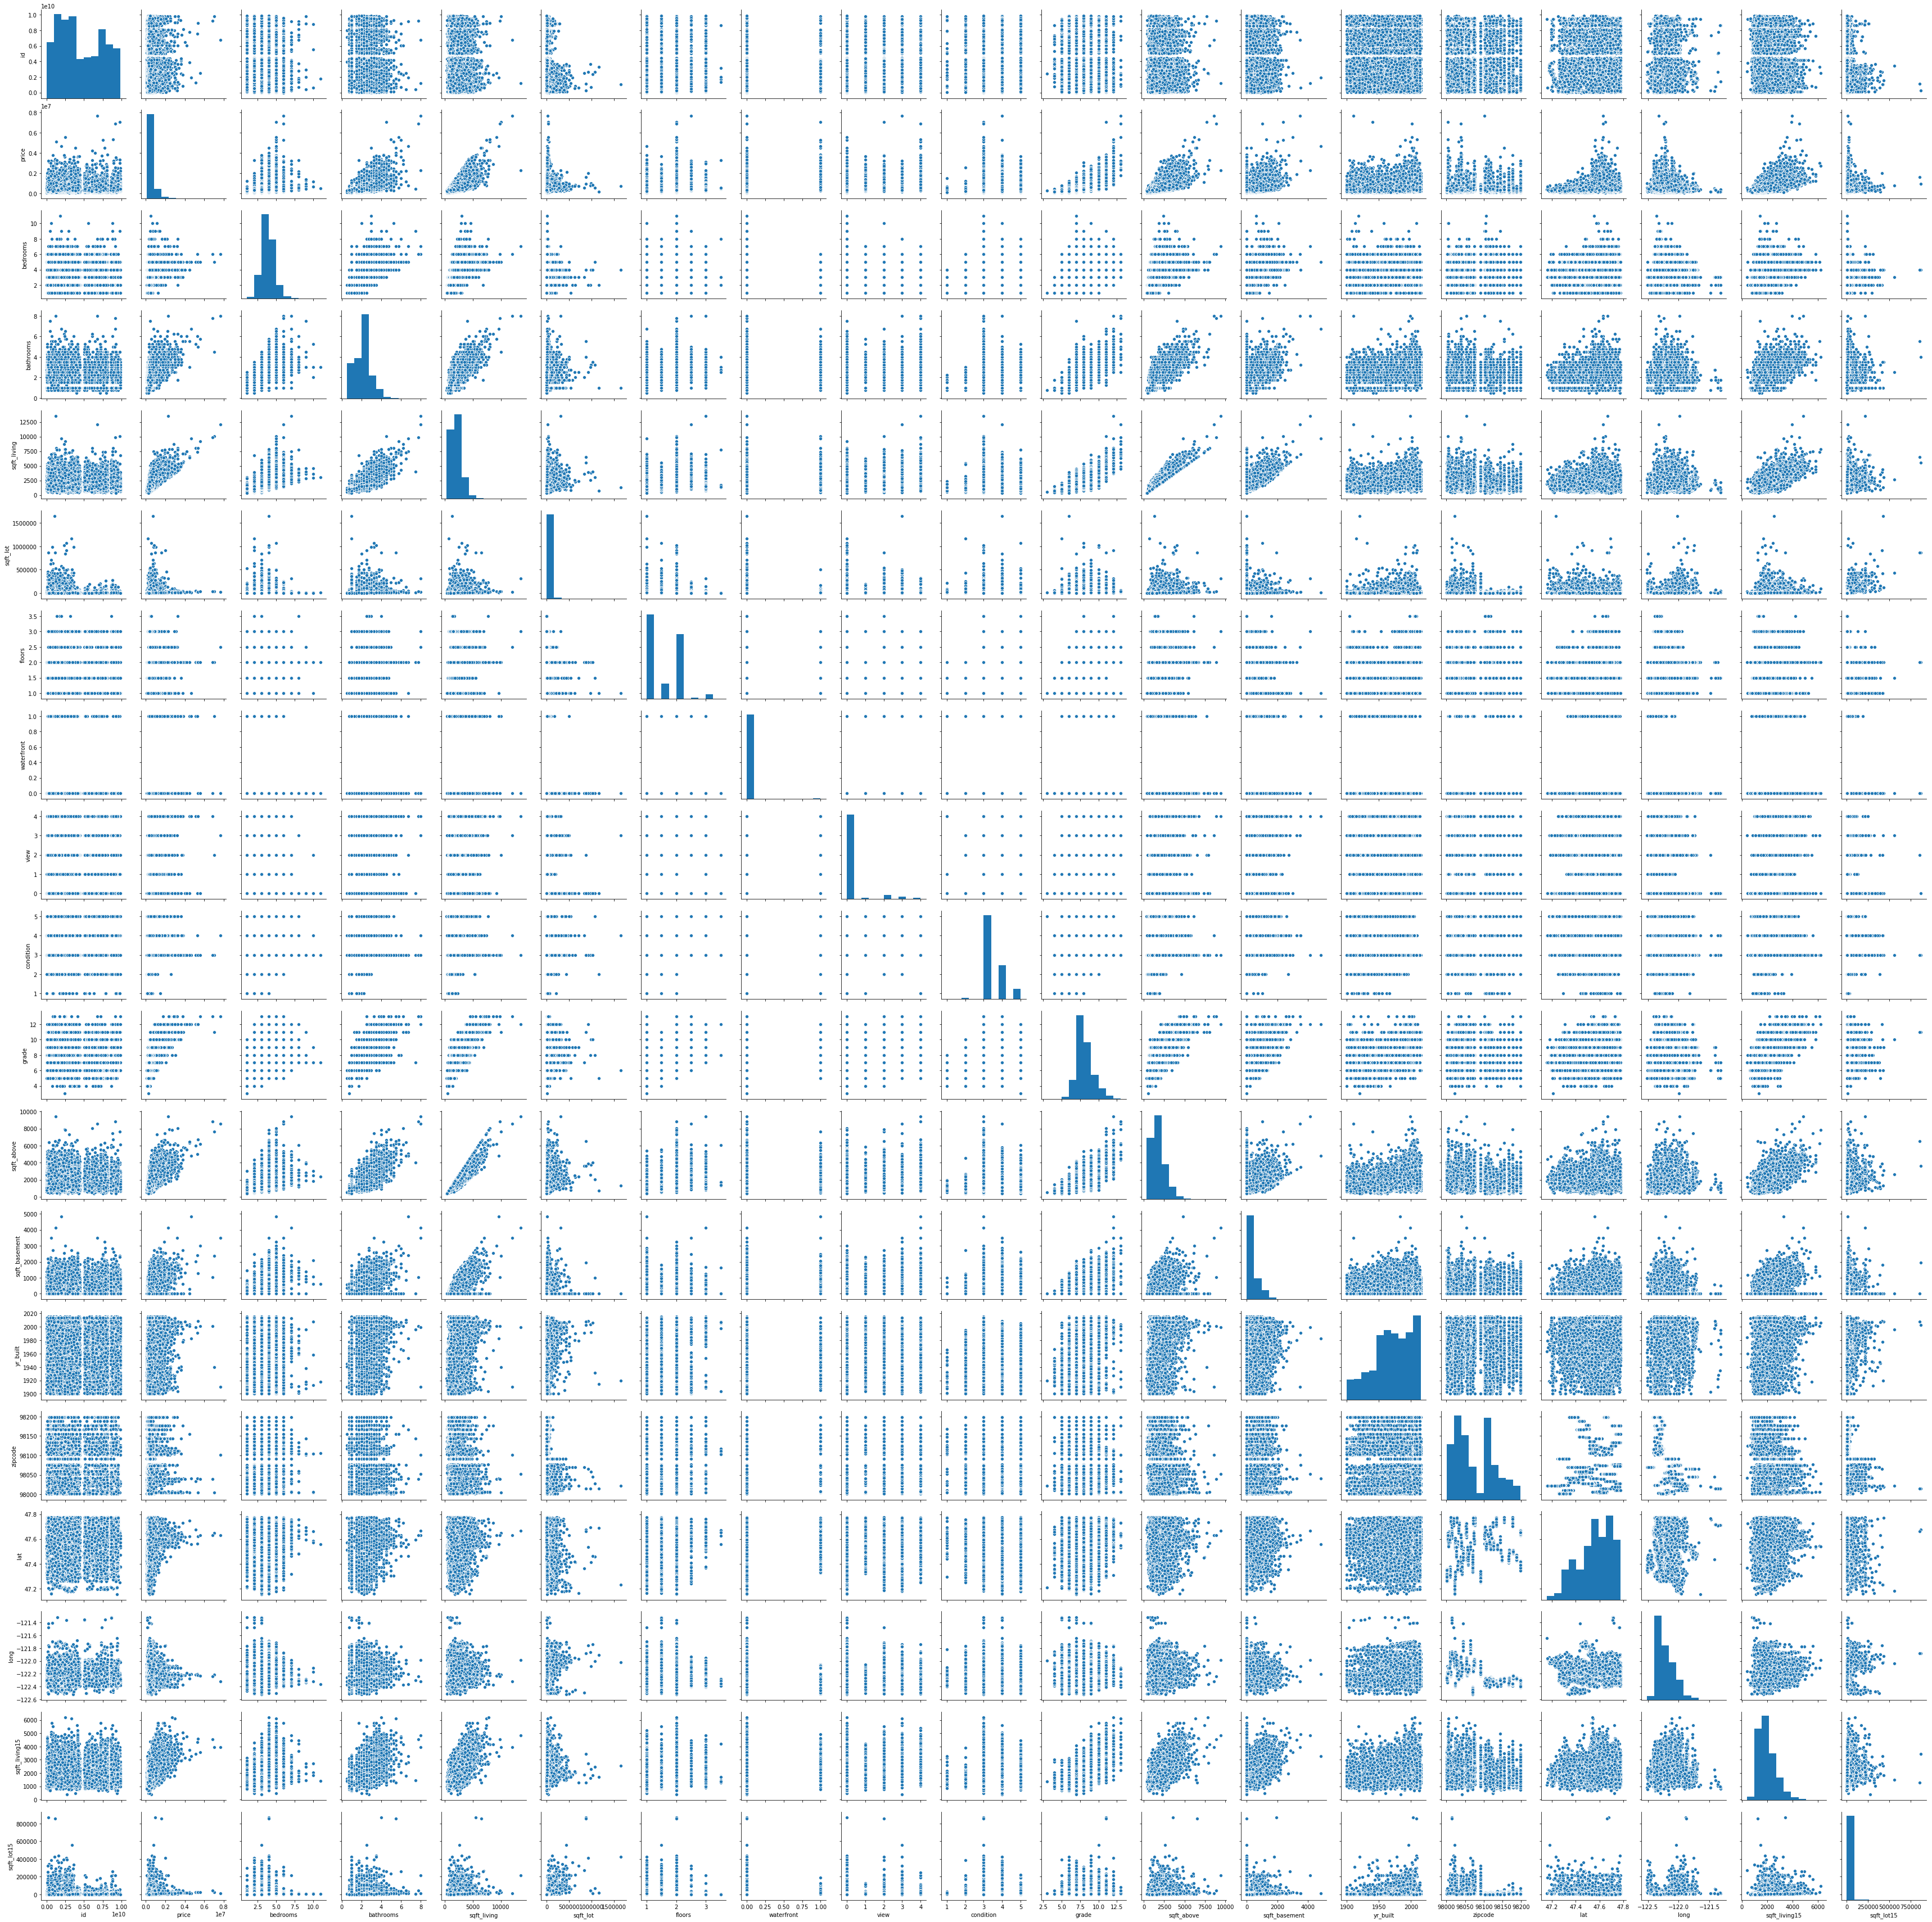

In [34]:
sns.pairplot(df);

Based on the above graph, 'bedrooms, 'floors', 'waterfront', 'view', 'condition' and 'grade' are categorical values. Later, we'll transform the categorical variables.

Next step is to explore for multicollinearity and look at correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27918a58>,
      dtype=object)

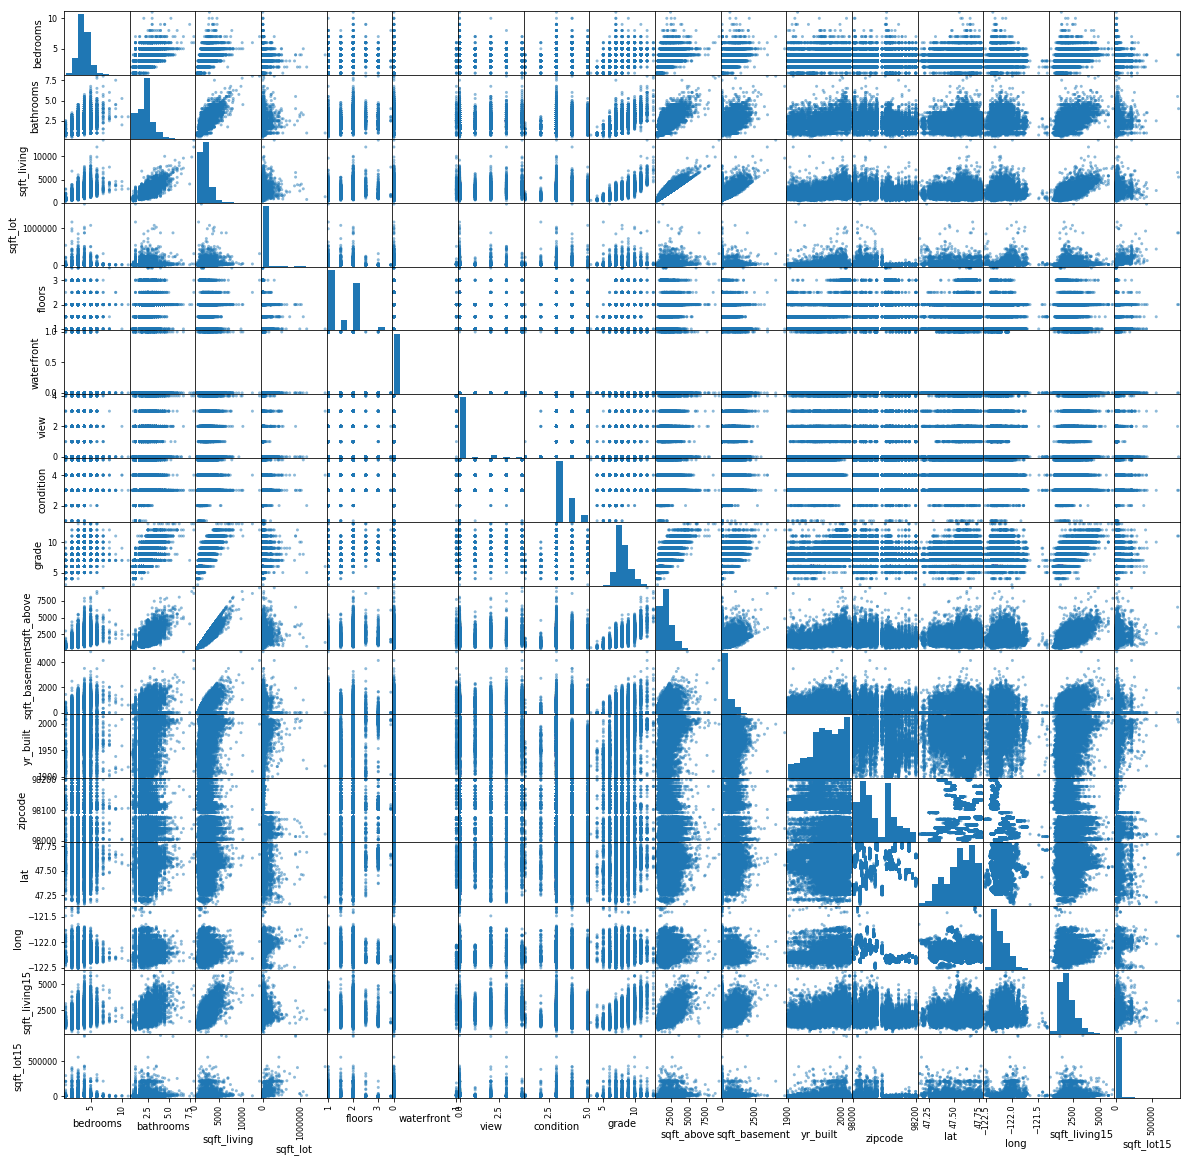

In [35]:
df_features = df.drop(['id','date','price'], axis=1)
pd.plotting.scatter_matrix(df_features, figsize=(20,20))

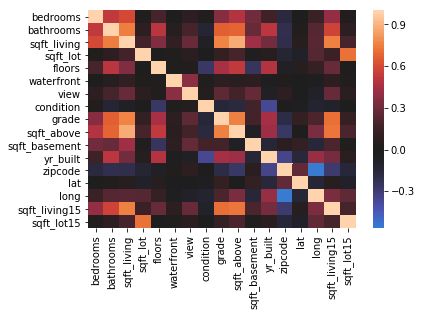

In [36]:
df_features.corr()
sns.heatmap(df_features.corr(), center=0);

## Exploring Data

First off, we'll describe the dataset using 5 point statistics.

In [37]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.114200e+04  2.114200e+04  21142.000000  21142.000000  21142.000000   
mean   4.581107e+09  5.405060e+05      3.371157      2.116096   2080.942531   
std    2.876357e+09  3.680831e+05      0.902213      0.768545    918.563816   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.309100e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.114200e+04  21142.000000  21142.000000  21142.000000  21142.000000   
mean   1.508757e+04      1.493615      0.006716      0.232665      3.409848   
std    4.121013e+04      0.539252      0.081680      0.764081      0.650422   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.043000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069575e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built       zipcode  \
count  21142.000000  21142.000000   21142.000000  21142.000000  21142.000000   
mean       7.658310   1789.104437     291.838095   1971.024359  98077.867704   
std        1.174272    828.413341     442.504364     29.322166     53.536744   
min        3.000000    370.000000       0.000000   1900.000000  98001.000000   
25%        7.000000   1200.000000       0.000000   1952.000000  98033.000000   
50%        7.000000   1560.000000       0.000000   1975.000000  98065.000000   
75%        8.000000   2210.000000     560.000000   1997.000000  98117.000000   
max       13.000000   9410.000000    4820.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21142.000000  21142.000000   21142.000000   21142.000000  
mean      47.560268   -122.213871    1987.302478   12739.322202  
std        0.138592      0.140598     685.671655   27169.859971  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471225   -122.328000    1490.000000    5100.000000  
50%       47.572000   -122.230000    1840.000000    7626.000000  
75%       47.678175   -122.125000    2360.000000   10087.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

Then, we'll use pandas histogram plotting to plot histograms for all the variables in the dataset.

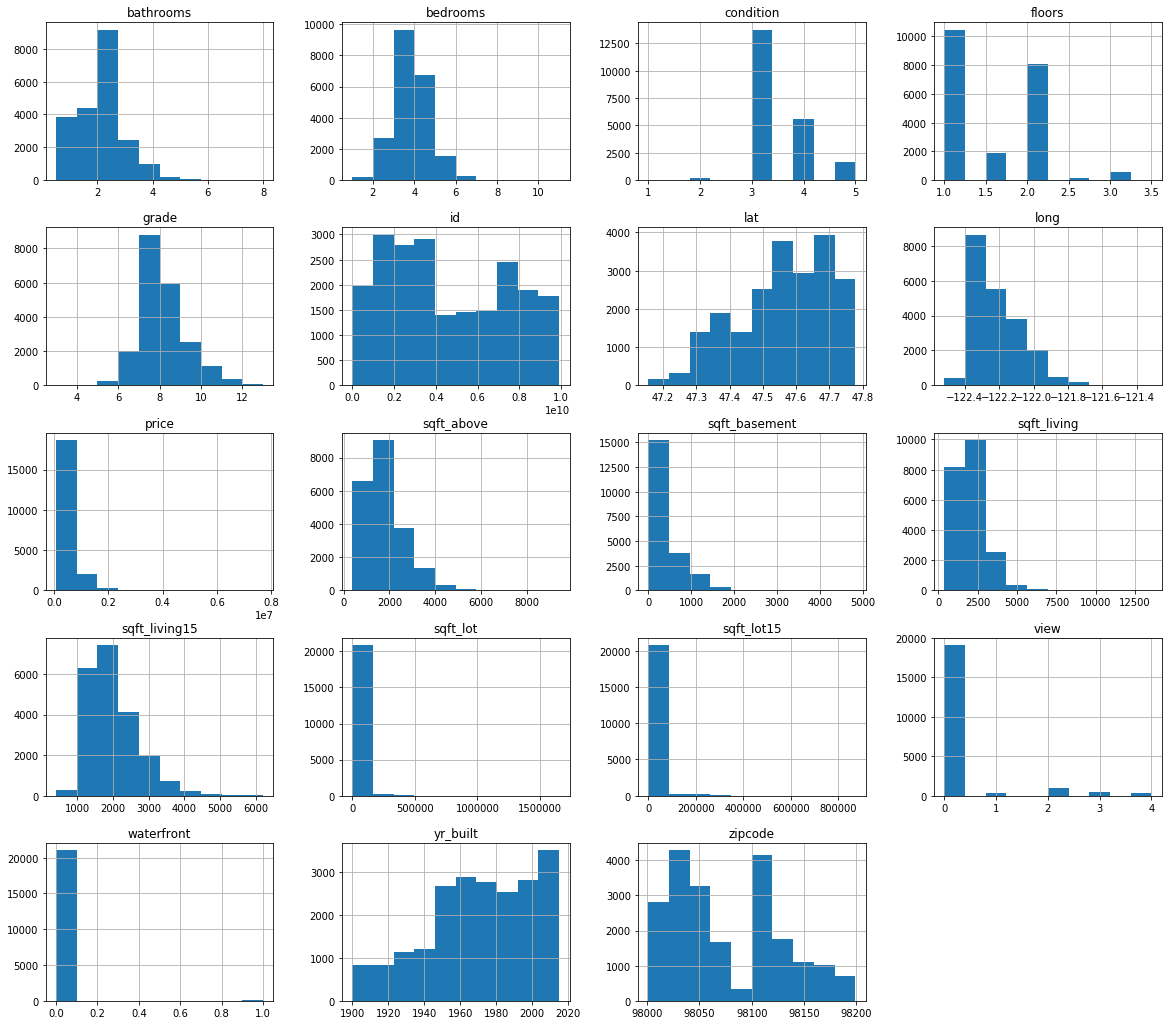

In [38]:
df.hist(figsize = (20,18));

Let's build normalized histograms with KDE plots to explore the distributions further. We will use only continuous variables to visualize probability densities and KDEs.

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


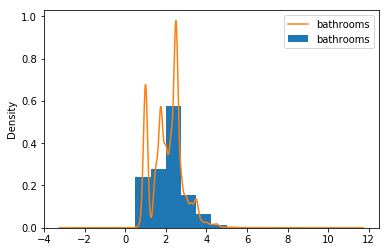

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


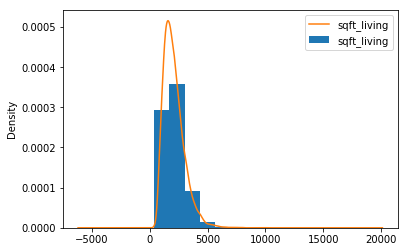

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


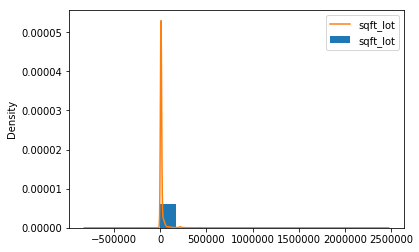

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


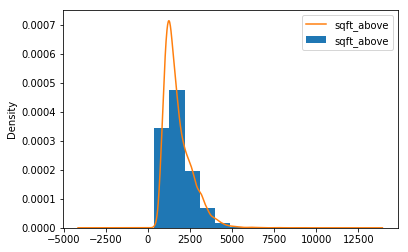

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


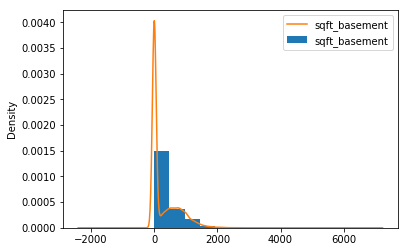

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


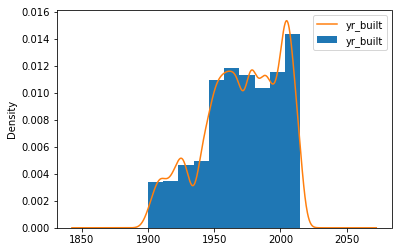

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


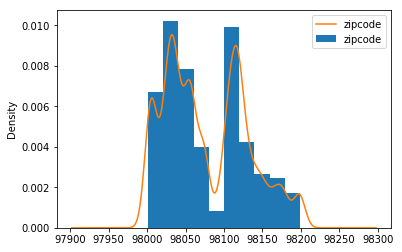

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


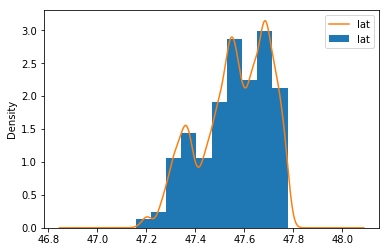

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


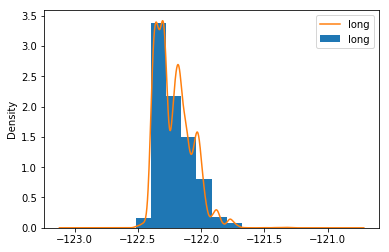

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


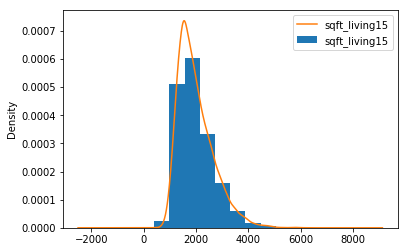

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


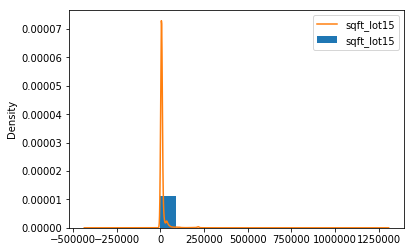

In [39]:
for column in ['bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

We need to normalize our data.

In [40]:
df_norm = df.copy()
for i in df.columns:
    if i == 'date':
        pass
    elif i == 'price':
        df_norm[i] = np.log(df_norm[i])
    else:
        df_norm[i] = (df_norm[i] - df_norm[i].mean())/(df_norm[i].max() - df_norm[i].min())
        
##Credit: https://medium.com/@mandoiwanaga08/feature-selection-4af9b5efb044

We will now build joint plots to check for the linearity assumption between predictors and target variable.

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


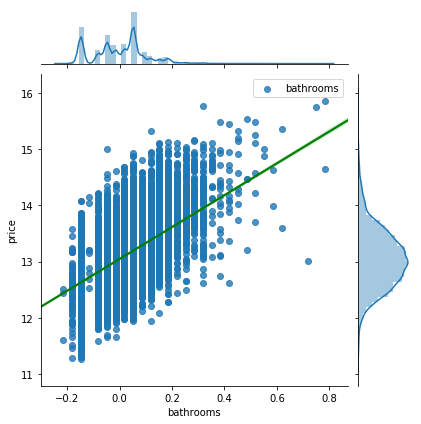

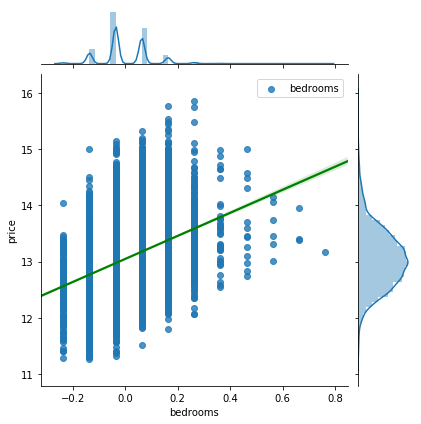

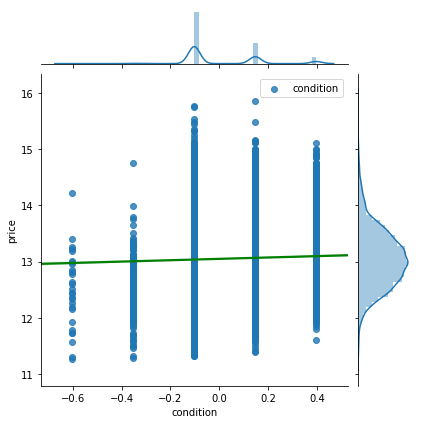

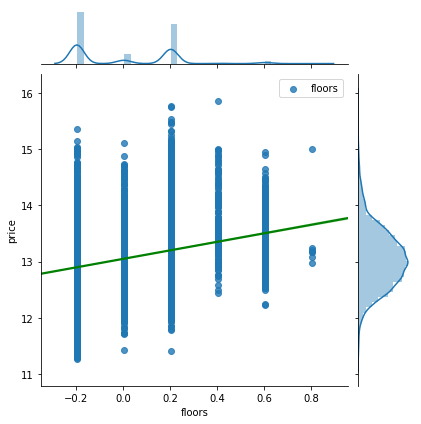

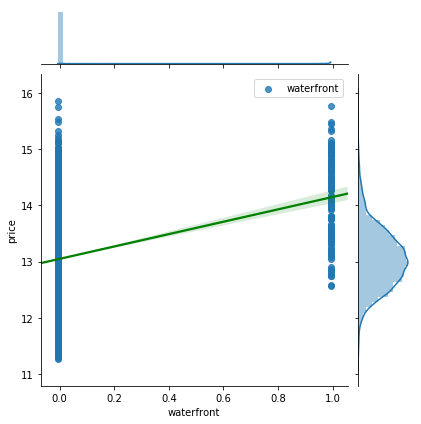

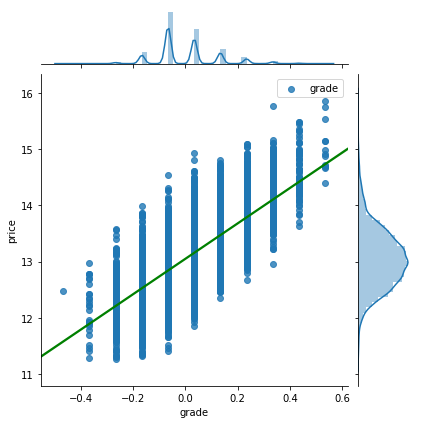

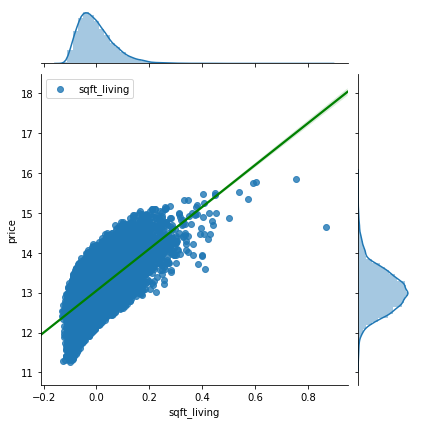

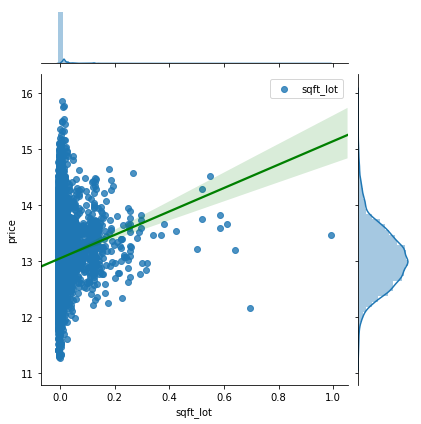

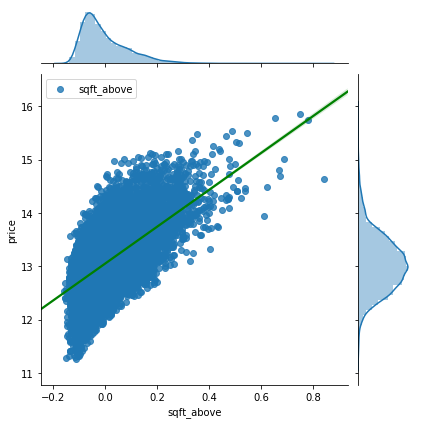

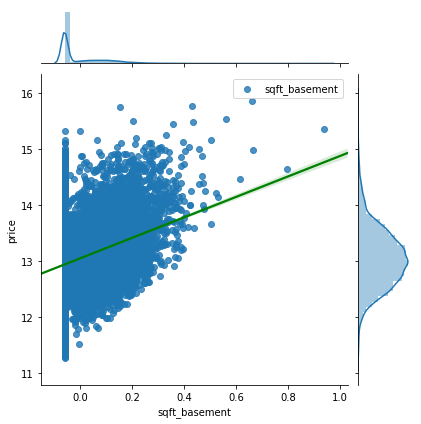

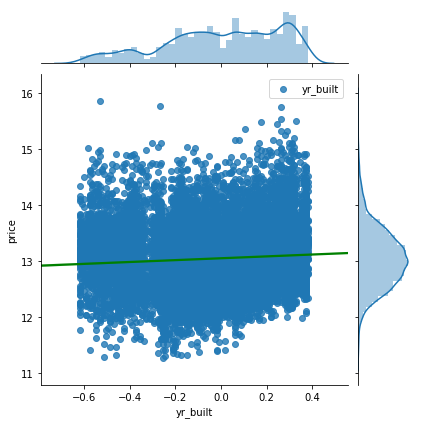

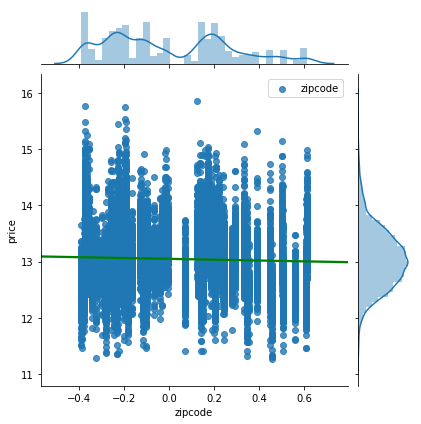

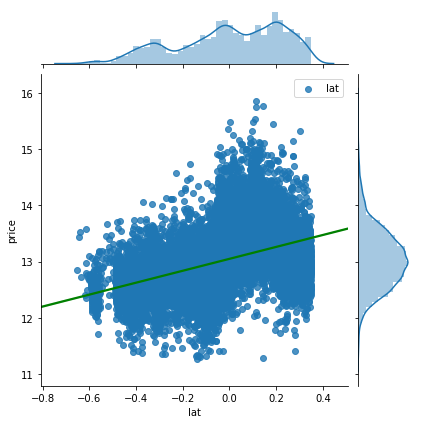

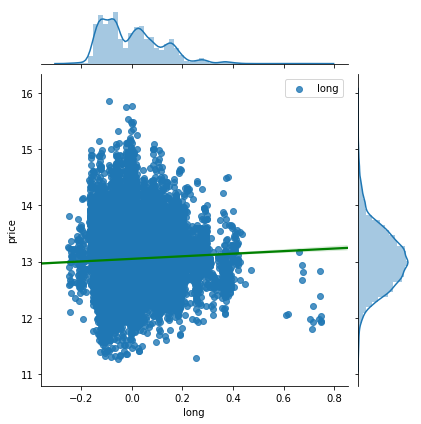

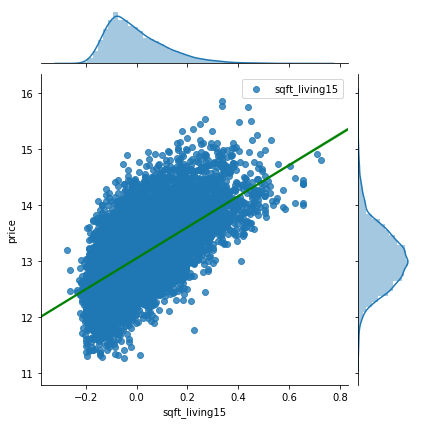

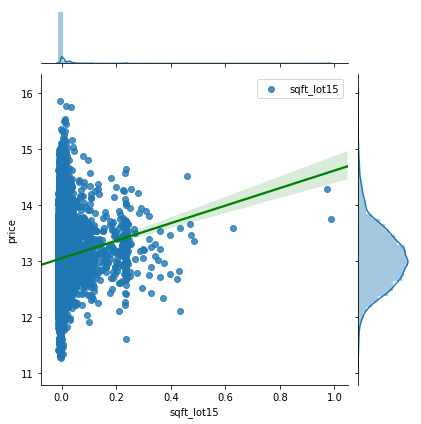

In [41]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'waterfront', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df_norm, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

In [42]:
df_norm.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.003935  0.003727   0.006103    -0.011739 -0.132278   
price         -0.003935  1.000000  0.350787   0.551117     0.695448  0.098976   
bedrooms       0.003727  0.350787  1.000000   0.527526     0.593340  0.033418   
bathrooms      0.006103  0.551117  0.527526   1.000000     0.755275  0.087880   
sqft_living   -0.011739  0.695448  0.593340   0.755275     1.000000  0.172937   
sqft_lot      -0.132278  0.098976  0.033418   0.087880     0.172937  1.000000   
floors         0.019249  0.310145  0.184979   0.504063     0.354675 -0.007531   
waterfront    -0.002923  0.170658  0.000190   0.064624     0.106038  0.021210   
view           0.013017  0.344952  0.082702   0.186790     0.282945  0.072417   
condition     -0.023102  0.037563  0.022564  -0.127979    -0.061245 -0.009646   
grade          0.008661  0.703534  0.366745   0.666489     0.763098  0.113397   
sqft_above    -0.010599  0.601499  0.492695   0.686453     0.876679  0.183456   
sqft_basement -0.004525  0.317564  0.309298   0.282712     0.434598  0.015540   
yr_built       0.022189  0.080797  0.162247   0.508401     0.319448  0.052760   
zipcode       -0.011167 -0.038257 -0.157202  -0.204297    -0.198897 -0.129351   
lat           -0.004695  0.449266 -0.011191   0.025015     0.053009 -0.085449   
long           0.021344  0.050874  0.135692   0.224466     0.240782  0.230578   
sqft_living15 -0.003073  0.620376  0.403859   0.570123     0.756387  0.143421   
sqft_lot15    -0.138018  0.092715  0.031707   0.088828     0.184460  0.720648   

                 floors  waterfront      view  condition     grade  \
id             0.019249   -0.002923  0.013017  -0.023102  0.008661   
price          0.310145    0.170658  0.344952   0.037563  0.703534   
bedrooms       0.184979    0.000190  0.082702   0.022564  0.366745   
bathrooms      0.504063    0.064624  0.186790  -0.127979  0.666489   
sqft_living    0.354675    0.106038  0.282945  -0.061245  0.763098   
sqft_lot      -0.007531    0.021210  0.072417  -0.009646  0.113397   
floors         1.000000    0.020304  0.027714  -0.264217  0.459202   
waterfront     0.020304    1.000000  0.378926   0.016740  0.083600   
view           0.027714    0.378926  1.000000   0.045396  0.249348   
condition     -0.264217    0.016740  0.045396   1.000000 -0.148466   
grade          0.459202    0.083600  0.249348  -0.148466  1.000000   
sqft_above     0.524207    0.072199  0.166601  -0.159210  0.756379   
sqft_basement -0.245123    0.084953  0.275453   0.170923  0.168043   
yr_built       0.489647   -0.023847 -0.054343  -0.362069  0.448108   
zipcode       -0.058957    0.028154  0.085105   0.003383 -0.185121   
lat            0.049018   -0.011564  0.006388  -0.015701  0.113407   
long           0.125890   -0.036375 -0.076133  -0.106205  0.199170   
sqft_living15  0.280264    0.085172  0.280275  -0.093398  0.713569   
sqft_lot15    -0.011558    0.030249  0.072551  -0.004826  0.121915   

               sqft_above  sqft_basement  yr_built   zipcode       lat  \
id              -0.010599      -0.004525  0.022189 -0.011167 -0.004695   
price            0.601499       0.317564  0.080797 -0.038257  0.449266   
bedrooms         0.492695       0.309298  0.162247 -0.157202 -0.011191   
bathrooms        0.686453       0.282712  0.508401 -0.204297  0.025015   
sqft_living      0.876679       0.434598  0.319448 -0.198897  0.053009   
sqft_lot         0.183456       0.015540  0.052760 -0.129351 -0.085449   
floors           0.524207      -0.245123  0.489647 -0.058957  0.049018   
waterfront       0.072199       0.084953 -0.023847  0.028154 -0.011564   
view             0.166601       0.275453 -0.054343  0.085105  0.006388   
condition       -0.159210       0.170923 -0.362069  0.003383 -0.015701   
grade            0.756379       0.168043  0.448108 -0.185121  0.113407   
sqft_above       1.000000      -0.052266  0.425160 -0.260800 -0.000307   
sqft_basement   -0.052266       1.000

There is correlation between price and sqft_living / footage of the house (0.69), grade given to the housing unit, based on King County grading system (0.70), sqft_above / square footage of house apart from basement (0.60) and sqft_living15 / square footage of interior housing living space for the nearest 15 neighbors (0.62).

Handle outliers

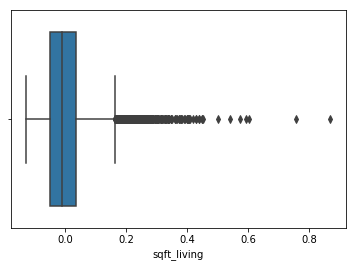

In [43]:
sns.boxplot(x=df_norm['sqft_living'])

In [44]:
bedrooms_dummies = pd.get_dummies(df['bedrooms'], prefix='bedrooms')
floors_dummies = pd.get_dummies(df['floors'], prefix='floors')
view_dummies = pd.get_dummies(df['view'], prefix='view')
condition_dummies = pd.get_dummies(df['condition'], prefix='condition')
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')

In [45]:
df = df.drop(['bedrooms','floors','view','condition','grade'], axis=1)

In [46]:
df = pd.concat([df, bedrooms_dummies, floors_dummies, view_dummies, condition_dummies, grade_dummies], axis=1)
df.head()

id        date     price  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900.0       1.00         1180      5650   
1  6414100192   12/9/2014  538000.0       2.25         2570      7242   
2  5631500400   2/25/2015  180000.0       1.00          770     10000   
3  2487200875   12/9/2014  604000.0       3.00         1960      5000   
4  1954400510   2/18/2015  510000.0       2.00         1680      8080   

   waterfront  sqft_above  sqft_basement  yr_built    ...     grade_4  \
0         0.0        1180              0      1955    ...           0   
1         0.0        2170            400      1951    ...           0   
2         0.0         770              0      1933    ...           0   
3         0.0        1050            910      1965    ...           0   
4         0.0        1680              0      1987    ...           0   

   grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  \
0        0        0        1        0        0         0         0         0   
1        0        0        1        0        0         0         0         0   
2        0        1        0        0        0         0         0         0   
3        0        0        1        0        0         0         0         0   
4        0        0        0        1        0         0         0         0   

   grade_13  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 53 columns]

## Modeling Data

We will now build a multiple linear regression using sqft_living and sqft_above as features.

In [47]:
df_ols = pd.concat([df_norm.price, df_norm.sqft_living, df_norm.sqft_above], axis= 1)
df_ols.head()

price  sqft_living  sqft_above
0  12.309982    -0.068409   -0.067379
1  13.195614     0.037134    0.042134
2  12.100712    -0.099540   -0.112733
3  13.311329    -0.009183   -0.081759
4  13.142166    -0.030444   -0.012069

In [48]:
outcome = 'price'
predictors = df_ols.drop('price', axis=1)
pred_sum = "+".join(df_ols.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.983e+31
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        19:51:49   Log-Likelihood:             6.5169e+05
No. Observations:               21142   AIC:                        -1.303e+06
Df Residuals:                   21138   BIC:                        -1.303e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -9.77e-15   2.36e-15     -4.147      0.000   -1.44e-14   -5.15e-15
price           1.0000    1.8e-16   5.54e+15      0.000       1.000       1.000
sqft_living -2.753e-14   2.26e-15    -12.167      0.000    -3.2e-14   -2.31e-14
sqft_above   2.665e-14   1.55e-15     17.199      0.000    2.36e-14    2.97e-14
==============================================================================
Omnibus:                       47.596   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.331
Skew:                           0.007   Prob(JB):                     4.75e-09
Kurtosis:                       2.792   Cond. No.                         557.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inspecting Data

Since p-value is below 0.05, we can say that sqft_living and sqft_above serve as predictors of house prices.